In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sheet_id = "1t8yUN7srGyxqWzXTJfoeZOGyyF8iK6DNl-qqL-8mWUI"
sheet_name = "Concerts"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

In [3]:
df = pd.read_csv(url)
df.tail()

,Band,Date,Location,State,City,Ticket Price [EUR],Act,Notes,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
484,Airbourne,10.08.2023,Posthof,Austria,Linz,"46,20",Headliner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,Red Machete,07.12.2018,Ann and Pat,Austria,Linz,NaN,Support,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,Reverend Backflash,07.12.2018,Ann and Pat,Austria,Linz,NaN,Headliner,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,Reverend Backflash,29.05.2013,röda,Austria,Steyr,"12,00",Headliner,https://www.steyr.at/LET_THERE_BE_ROCK_present...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,Stoned Ponys,29.05.2013,röda,Austria,Steyr,NaN,Support,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['price'] = pd.to_numeric(df['Ticket Price [EUR]'].replace(',', '.', regex=True))
df['Date'] = pd.to_datetime(df['Date'], format="%d.%m.%Y")
df['year'] = df['Date'].dt.strftime('%Y')

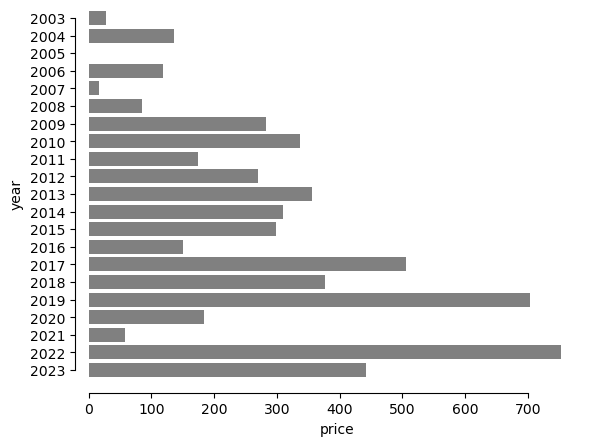

In [6]:
# bis exkl. hier
sum_per_year = df.groupby('year')['price'].sum().reset_index()
sns.barplot(x='price', y='year', data=sum_per_year, color='grey', order=sorted(df['year'].unique()))
sns.despine(offset=10, trim=True)